<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion_2/blob/main/CASO_04_credit_approval_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso: Credit Approval

## Descripción
Este caso simula un escenario realista relacionado con credit approval. Utiliza un dataset de 2000 registros con 10 características simuladas.

## Objetivo
Aplicar y comparar los modelos de clasificación: SVM, KNN, Árboles de Decisión y Boosting, para evaluar su desempeño en este contexto específico. Se utilizarán métricas como Accuracy, F1-Score y AUC-ROC.


### Paso 1: Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

### Paso 2: Cargar y explorar el dataset

In [2]:
df = pd.read_csv("/content/credit_approval.csv")
print("Primeros registros del dataset:")
print(df.head())

Primeros registros del dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   2.343564   3.007971   2.408021   0.385575  -0.418267   0.545775   
1   1.210669   1.782756  -0.612866   0.304934  -1.513255  -0.849396   
2   2.450186   1.049052   2.497787   0.959061  -1.514810  -0.777207   
3   4.024318  -2.331384   0.396956   0.284766  -2.691708  -3.618508   
4  -0.539612  -1.793690   0.884587  -0.331906  -1.880416  -1.195103   

   feature_7  feature_8  feature_9  feature_10  target  
0  -0.684573  -0.198618   1.403500    4.148101       1  
1  -1.402308   1.606865   2.191796    0.469542       0  
2  -0.847842   1.241748   0.905534    3.852311       1  
3  -1.596370   2.674262  -1.174402    1.749318       0  
4  -0.942353   0.107677  -0.123117   -1.359176       0  


### Paso 3: Separar variables predictoras (X) y variable objetivo (y), y dividir en entrenamiento y prueba

In [3]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Paso 4: Normalizar las variables predictoras para evitar sesgo por escala

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Paso 5: Definir y entrenar los modelos de clasificación

In [5]:
models = {
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Boosting": GradientBoostingClassifier()
}

### Paso 6: Evaluar el desempeño de cada modelo

In [6]:
for model_name, model in models.items():
    print(f"\n\033[1mModelo: {model_name}\033[0m")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC: {roc:.2f}")
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))


Modelo: SVM
AUC-ROC: 0.95
F1-Score: 0.8967851099830795
Accuracy: 0.8983333333333333
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       300
           1       0.91      0.88      0.90       300

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600


Modelo: KNN
AUC-ROC: 0.93
F1-Score: 0.8818635607321131
Accuracy: 0.8816666666666667
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       300
           1       0.88      0.88      0.88       300

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600


Modelo: Decision Tree
AUC-ROC: 0.79
F1-Score: 0.7973640856672158
Accuracy: 0.795
Reporte de Clasificación:
              pr

### Paso 7: Visualizar la Matriz de Confusión para cada modelo

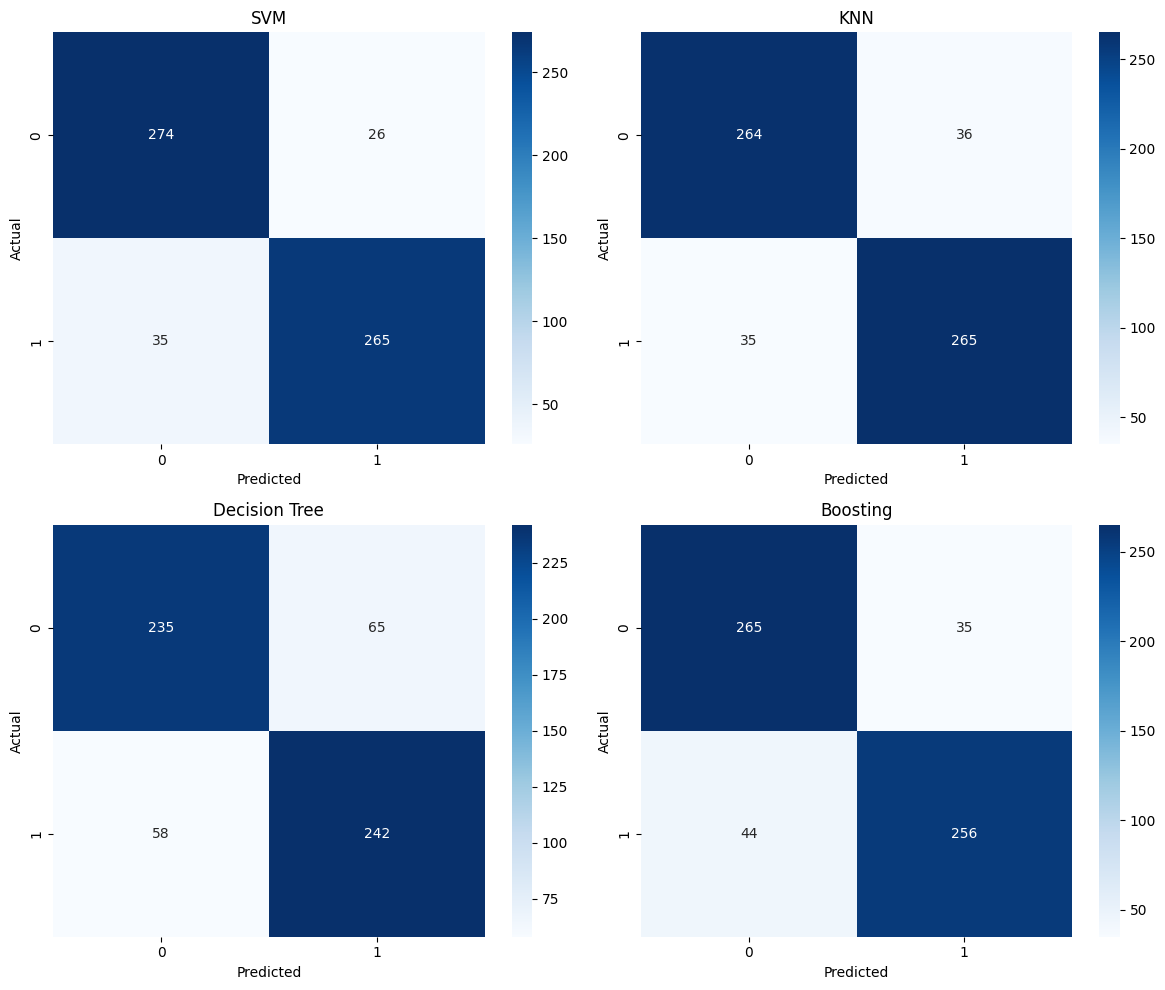

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
for ax, (model_name, model) in zip(axes.ravel(), models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues")
    ax.set_title(f"{model_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

### Paso 8: Graficar la curva ROC para comparar capacidad discriminativa

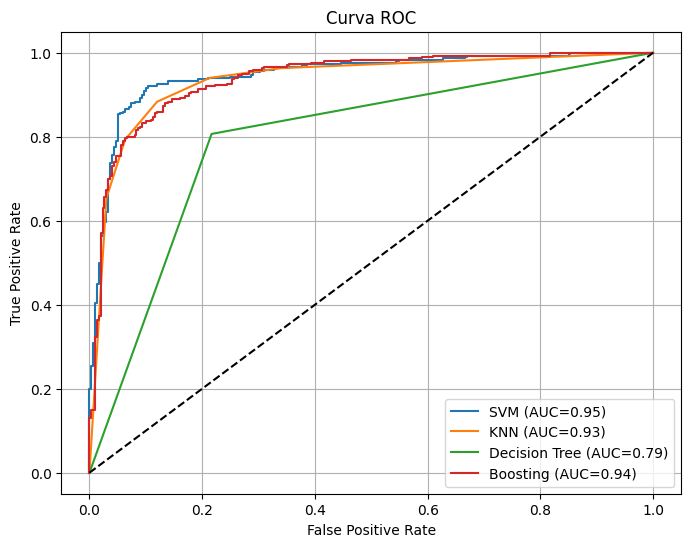

In [8]:
plt.figure(figsize=(8,6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

## Conclusiones del Caso: Credit Approval
- **SVM** demostró buena precisión y generalización con fronteras complejas.
- **KNN** fue fácil de implementar, pero sensible a la escala y al valor de K.
- **Árboles de Decisión** fueron interpretables pero propensos al sobreajuste.
- **Boosting (Gradient Boosting)** mostró mejor desempeño general a costa de más tiempo de entrenamiento.

Se recomienda seleccionar el modelo en función del objetivo del negocio y del balance entre precisión y complejidad.
